In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tawnyn\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [33]:
# Read in csv (already transformed)
df = pd.read_csv('..//..//data/patients/ER_Hosp_Users v3.csv')
df.pref_lang = df.pref_lang == "SPA"
df.replace(True, 1, inplace=True)
df.replace(False, 0, inplace=True)
df

,ID,zip,age,gender,pref_lang,priority,Asthma,Bi_Dis,CCHF,CKD,...,Psy_Dis,SUD,TBI,M_CC,Count_ER Visits,Inpatient,ER_Ad_Dif,ER_rate_m,label,Cat
0,P0001,90016,9,1,0.0,3,1,0,0,0,...,0,0,0,1,5,0,NaN,0.15,b-user,0
1,P0002,91402,60,1,0.0,0,0,0,0,0,...,0,0,0,2,3,0,NaN,0.13,b-user,0
2,P0003,90605,10,2,0.0,3,1,0,0,0,...,0,0,0,1,0,1,NaN,NaN,h-only,0
3,P0004,90640,25,2,1.0,5,0,0,0,0,...,0,0,0,1,3,13,1.0,1.00,a-user,0
4,P0005,90064,23,2,0.0,5,1,0,0,0,...,0,0,0,1,3,3,0.0,0.00,a-user,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,P3970,90057,49,2,0.0,1,1,0,0,1,...,0,0,0,7,13,10,NaN,NaN,hi-user,1
3970,P3971,91405,5,2,1.0,3,1,0,0,0,...,0,0,0,1,6,0,NaN,NaN,hi-user,1
3971,P3972,91402,19,2,1.0,0,0,0,0,0,...,0,0,0,1,3,0,NaN,0.11,b-user,0
3972,P3973,90280,50,1,1.0,1,0,1,0,0,...,1,0,0,4,6,2,0.0,2.00,a-user,0


In [47]:
# Retrive all possible inputs
selected_features = df.iloc[:, 1:21]
selected_features

,zip,age,gender,pref_lang,priority,Asthma,Bi_Dis,CCHF,CKD,CLD,CAD,COPD,Dem,DM,HTN,MDD,Psy_Dis,SUD,TBI,M_CC
0,90016,9,1,0.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,91402,60,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2
2,90605,10,2,0.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,90640,25,2,1.0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,90064,23,2,0.0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,90057,49,2,0.0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,0,7
3970,91405,5,2,1.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3971,91402,19,2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3972,90280,50,1,1.0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,4


In [48]:
X = selected_features
y = df["label"]
# y = df["Target"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3974, 20) (3974,)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,zip,age,gender,pref_lang,priority,Asthma,Bi_Dis,CCHF,CKD,CLD,CAD,COPD,Dem,DM,HTN,MDD,Psy_Dis,SUD,TBI,M_CC
1592,90262,62,2,1.0,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,3
679,90014,36,2,0.0,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2
3486,91316,48,1,0.0,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2
3740,90016,58,1,0.0,2,0,1,0,0,0,0,0,0,0,0,1,1,0,0,3
781,91364,63,2,0.0,3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,3


In [50]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

In [52]:
# # Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)

In [53]:
# Create the SVC Model
# from sklearn.svm import SVC 
# model = SVC(kernel='poly')
# model.fit(X_train_scaled, y_train_categorical)

In [54]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.262751677852349
Testing Data Score: 0.28772635814889336


In [56]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model, param_grid, verbose=3)

In [57]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.374, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.394, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.352, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.349, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.356, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.374, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.394, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.352, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.349, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.356, total=   0.2s
[CV] 

[CV] .................. C=50, gamma=0.0001, score=0.396, total=   1.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.357, total=   1.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.341, total=   0.9s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.351, total=   0.9s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.374, total=   0.8s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.396, total=   0.9s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.357, total=   1.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [58]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 1, 'gamma': 0.0001}
0.3651006711409396


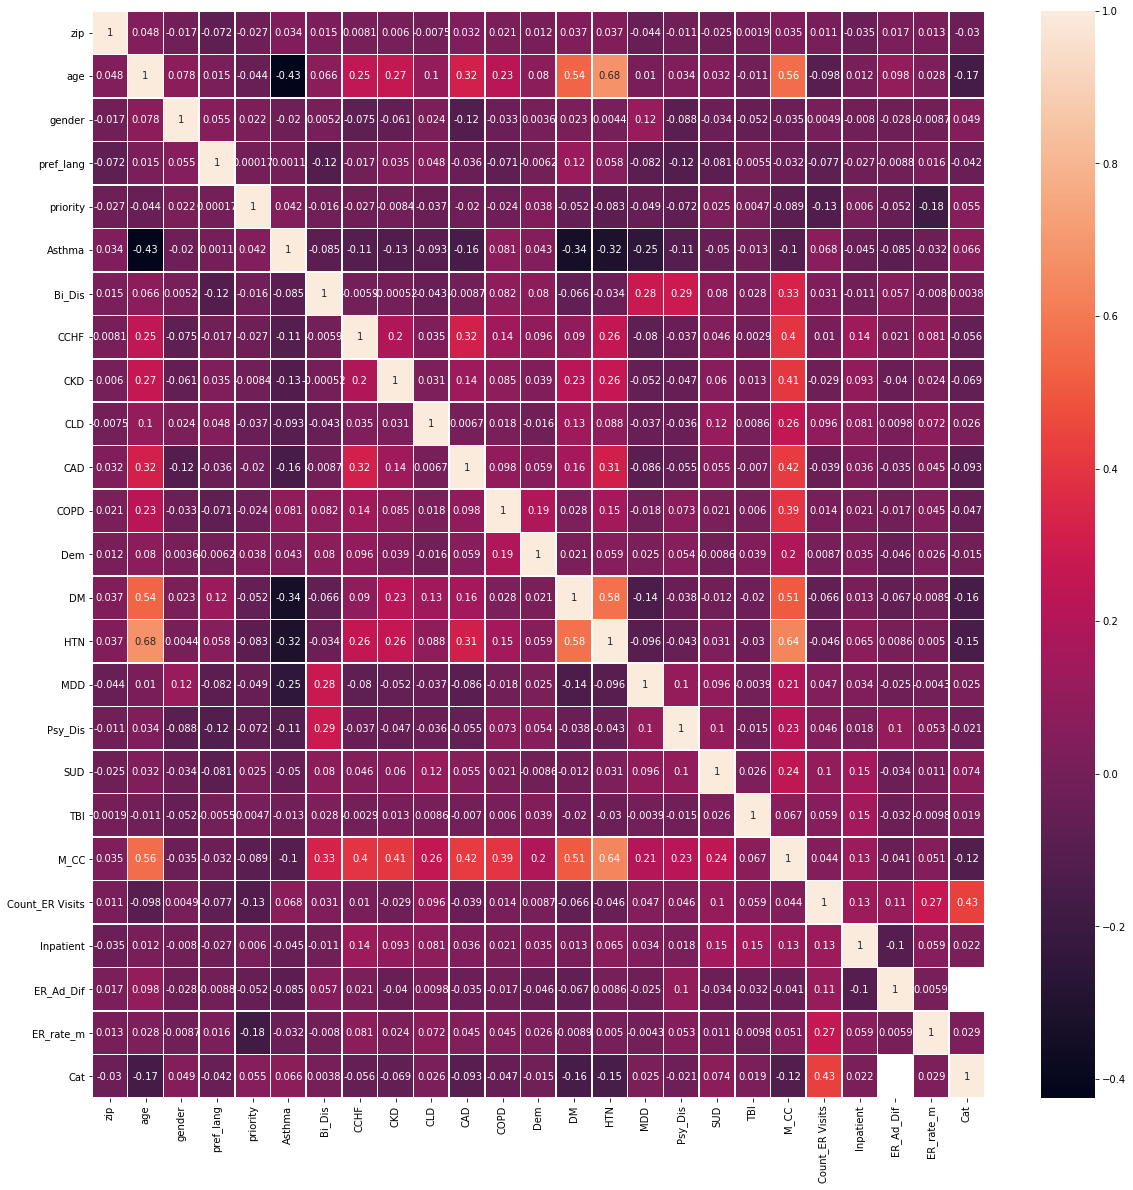

In [59]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, linewidths=.5)